# Part I - (bike_share Exploration Title)
## by Egbebuike Emmanuel

## Introduction
I would be analysing the **Ford GoBike System Data** This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In this analysis, I would check for relationships and stories that the data tell us. I would analyse the bike_share in phases, going from monovariate, bivariate and then multivariate. Visualizations would be strongly used to show results and guide the reader through my findings


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#import the bike_share
dataset = pd.read_csv("201902-fordgobike-tripdata.csv")

## Preliminary Wrangling

In [3]:
# high-level overview of data shape and composition
print(dataset.shape)
print(dataset.dtypes)
dataset.head(5)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#check for the null valued bike_shares and the column types
print(dataset.isnull().sum())
dataset.info()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       1832

In [5]:
# check for uniqueness in the columns to have a feel of the values composition
dataset.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

### What is the structure of your bike_share?

The bike_share originally has 183412 rows and 15 columns. It consists of trip data from a start station to an end station and tells us the age of the user among other things. its columns are: 

        'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'

additionally, there are 329 categorical stations and over 4000 different bikes

### What is/are the main feature(s) of interest in your dataset?

> The duration_sec is the main feature.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the start_time and end_time (which I will convert to weekday and day hour), member gender, start and end station name and then member birth year are important in investigation the duration_sec. In this dataset, the duration_sec is the most derived, but it will be interesting to see how the independent variables affect it. 

In my own thinking, the end time is partially dependent on the start time. well, we we see about this. 
In this dataset:
1. it will be interesting to see what age groups are more akin to using the bike
2. if a certain age groups are known to use the bike for more hours(time)
3. I want to see if the weekday affects the number of bikes usage, or average use time, or whether some days enjoy usage at certain hours
4. how the gender of users affect how long they ride this bike and what day they prefer
5. it will also be nice to see the distribnution of bikes usage or duration of usage in the different stations or whether any two stations enjoy inter station rides mostly

**NB** In this exploration, I sometimes use *outliers* to mean increased duration or more duration. 

## Clean up the data

In [6]:
bike_share = dataset.copy()
#remove the rows with nulls
bike_share = bike_share.dropna()
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
#change the time to date time
bike_share.start_time = bike_share.start_time.astype("datetime64[ns]")
bike_share.end_time = bike_share.end_time.astype("datetime64[ns]")

In [8]:
#change member birth year and the stations id to int
bike_share.member_birth_year = bike_share.member_birth_year.astype("int")
bike_share.start_station_id = bike_share.start_station_id.astype("int")
bike_share.end_station_id = bike_share.end_station_id.astype("int")

In [9]:
#extract the day and hour from the time
bike_share["start_day"] = bike_share.start_time.apply(lambda x: x.strftime("%a"))
bike_share["start_hour"] = bike_share.start_time.apply(lambda x: int(x.strftime("%H")))

bike_share["end_day"] = bike_share.end_time.apply(lambda x: x.strftime("%a"))
bike_share["end_hour"] = bike_share.end_time.apply(lambda x: int(x.strftime("%H")))

I suspect that the gps (latitude and longitude) would be almost flat-out across observations. And I would want to exclude the gps points from the columns. I wont be analysing them individually also since  2 coordinates (long and lat) are required to make a point. 

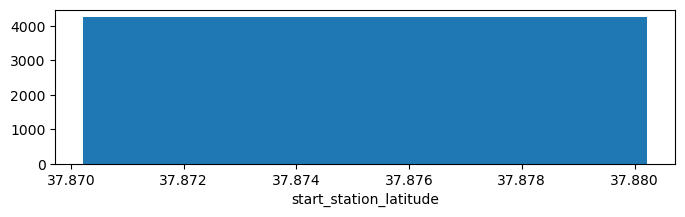

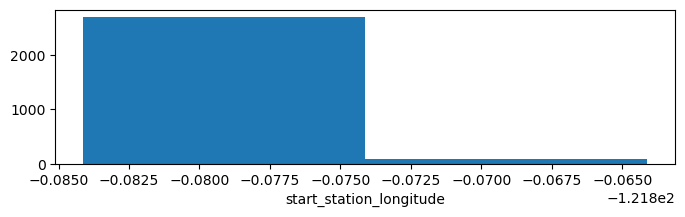

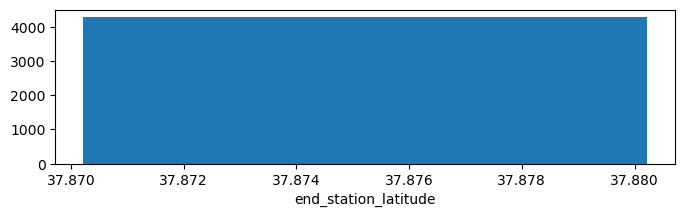

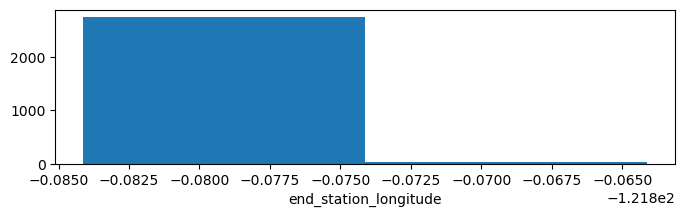

In [10]:
# start_station_latitude
gps_arr = ["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"]

for i in gps_arr:
    binsize = 0.01
    bins = np.arange(bike_share[i].max()-binsize, bike_share[i].max()+binsize, binsize)
    plt.figure(figsize=[8, 2])
    plt.hist(data = bike_share, x = i, bins = bins)
    plt.xlabel(i)
    plt.show()

I will proceed to remove the longitude and latittude points

In [11]:
# drop the location points
bike_share.drop(["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"], axis = 1, inplace = True)

**NB** The aggregations below would be needed if we want to compare average duration acress start - end stations pairs. However i would not be analysing duration across the locations or any location pair.

In [12]:
# a = bike_share.start_station_id.values
# b = bike_share.end_station_id.values

# c = pd.Series(zip(a, b)).values
# unique = bike_share.copy()
# unique["n_index"]= c
# unique["n_index"] = unique["n_index"].apply(lambda x: " ".join(str(e) for e in sorted(x)))

# station_pairs = unique.groupby(["n_index"]).sum(numeric_only = True)["duration_sec"].reset_index()

# station_pairs["count"] = unique.groupby(["n_index"]).count()["duration_sec"].reset_index()["duration_sec"]
# station_pairs["avg_dist"] = station_pairs["duration_sec"]/station_pairs["count"]

# station_pairs

# station_pairs.sort_values(by=["count"], ascending=False).head(30)
#=====================================================================================================

start_stations = bike_share.groupby(["start_station_id"]).sum(numeric_only = True)["duration_sec"].reset_index()

start_stations["count"] = bike_share.groupby(["start_station_id"]).count()["duration_sec"].reset_index()["duration_sec"]
start_stations["avg_dur"] = start_stations["duration_sec"]/start_stations["count"]

start_stations.sort_values(by=["avg_dur"], ascending=False)

,start_station_id,duration_sec,count,avg_dur
38,46,140342,53,2647.962264
267,300,7402,3,2467.333333
201,229,42768,23,1859.478261
320,378,50114,28,1789.785714
319,377,1331415,780,1706.942308
...,...,...,...,...
244,276,114326,283,403.978799
279,313,32699,85,384.694118
203,231,34577,90,384.188889
255,287,11445,32,357.656250


##### convert start_day, end_day to ordinal

In [13]:
# convert start_day, end_day to ordinal
ordinal_var_dict = {'start_day': ['Mon', "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
                    'end_day': ['Mon', "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    bike_share[var] = bike_share[var].astype(ordered_var)


In [14]:
# descriptive statistics for numeric variables
bike_share.describe()
# bike_share.info()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,start_hour,end_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135,13.456165,13.609533
std,1642.204905,111.648819,111.335635,1659.195937,10.118731,4.734282,4.748029
min,61.000000,3.000000,3.000000,11.000000,1878.000000,0.000000,0.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,9.000000,9.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,14.000000,14.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,17.000000,18.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,23.000000,23.000000


we see that average age of riders is 2019 - 1984 = 35years, 41 years max and 18 years min. We also see the max birth as 1878. This has got to be a mistake and would be removed

Out of curiosity, I am wondering why it has to be 18 years min. Perhaps, thats the legal age to use the bikes. Maybe, I cant conclude. There isnt much data to investigate or conclude so.

If I look at te average start hour/end hour, I can conclude that most of the bikes usage is close to 1:30pm

## Univariate Exploration

I will start by looking at the main variable of interest duration_sec. How does each variable relate with the duration independently? I will begin with the duration_sec itself.

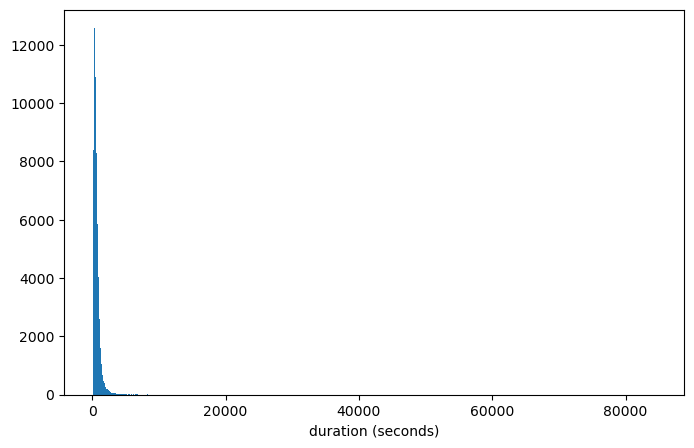

In [15]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(0, bike_share['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'duration_sec', bins = bins)
plt.xlabel('duration (seconds)')
plt.show()

There seems to be a very potent outlier on the duration column. From the above histogram, it seems most of the data are below 5000. It would be nice to see how many data points exceeds this 5000 and 20000

In [16]:
print((bike_share["duration_sec"] > 2000).sum())
print((bike_share["duration_sec"] > 5000).sum())
print((bike_share["duration_sec"] > 10000).sum())
print((bike_share["duration_sec"] > 20000).sum())

4692
884
358
173


Well, it seems quite a number of points can be said be be well into the _outlier_ region. We can remove these "seemingly" outliers. 5000 points in over 170000 point still makes our data interpretable and linear. But the question is "are the outliers valid?"

Before we decide to removes these "outliers", lets see how they appear on a log scale

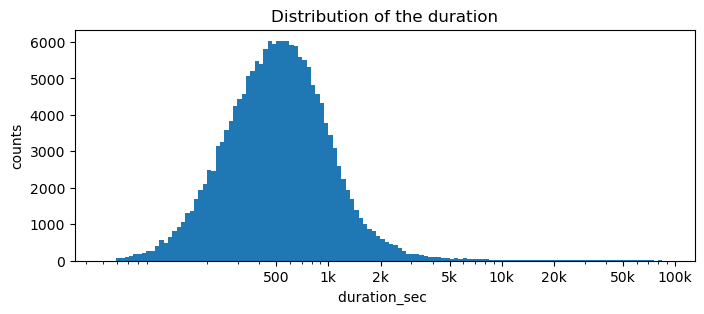

In [17]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bike_share['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 3])
plt.hist(data = bike_share, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [500, '1k', '2k', '5k', '10k', '20k', "50k", "100k"])
plt.title("Distribution of the duration")
plt.ylabel("counts")
plt.xlabel('duration_sec ')
plt.show()

Well, the data look nicer on a logarimithic scale. But then, there are still some obvious progression of outliers. from 5k up until about 100k. For now, I will allow the outlier stay.

Also, we see a largely unimodal (~500) distribution that closely resembles a normal distribution on this log scale

In [18]:
#peek into the assumed outliers
bike_share[bike_share.duration_sec > 40000].sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour
32098,69980,2019-02-23 19:52:25.335,2019-02-24 15:18:46.072,21,Montgomery St BART Station (Market St at 2nd St),369,Hyde St at Post St,2034,Customer,1993,Male,No,Sat,19,Sun,15
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thu,17,Fri,8
37862,60441,2019-02-22 20:34:30.746,2019-02-23 13:21:51.791,15,San Francisco Ferry Building (Harry Bridges Pl...,21,Montgomery St BART Station (Market St at 2nd St),6474,Subscriber,1990,Female,Yes,Fri,20,Sat,13
8631,81549,2019-02-27 09:41:38.552,2019-02-28 08:20:48.386,138,Jersey St at Church St,140,Cesar Chavez St at Dolores St,2266,Subscriber,1963,Female,No,Wed,9,Thu,8


Actually, these assumed outliers are valid. They represent data points spanning very long hours of usage. Mostly from a day to the day after. Although our data shows us that points from 10,000 and above are most likely too far flung. I would remove them. This means removing about 358 points in over 174k points. 

In [19]:
# #remove the outliers
bike_share = bike_share[bike_share.duration_sec < 10000]

Next, I will add a log of the duration into the bike_share. This will make it easier to plot/visualize figures subsequently

In [20]:
bike_share["duration_log"] = np.log10(bike_share["duration_sec"])

#### Now lets look at the variable of interest. Age

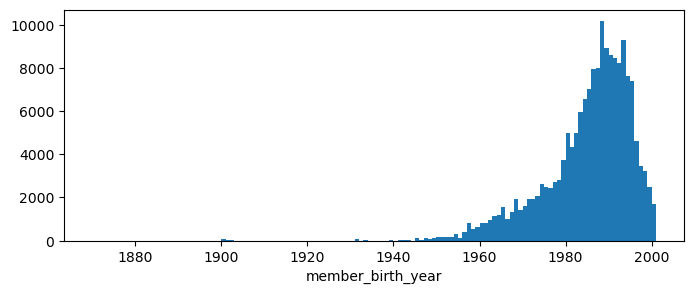

In [21]:
# plotting carat on a standard scale
binsize = 1
bins = np.arange(1870, bike_share['member_birth_year'].max()+binsize, binsize)
plt.figure(figsize=[8, 3])
plt.hist(data = bike_share, x = 'member_birth_year', bins = bins)
plt.xlabel('member_birth_year')
plt.show()

In [22]:
# view the distributions of the left outliers
bike_share[bike_share.member_birth_year < 1930].member_birth_year.value_counts()#.sample(4)

1900    53
1902    11
1901     6
1920     3
1878     1
1928     1
1910     1
1927     1
Name: member_birth_year, dtype: int64

The above graph is skewed to the left. The most ares of the graph lies in the right. This dipict that more younger folks use bikes than older people. Again, there is an abrupt end of the data at 2001. The data does not tells us why. There are 2 noticiable spikes in the histogtam. I would say it is around 1990 and 1995. It doesnt convey much info. 

Again, this data proove to be a bit dirty. I would not expect someone born in 1900, 1902, or 1901 to ride a bike in 2019. 1990 is the most with 53 points. I am thinking that this represent a default date in the dataset. It may be worthwhile to remove these points

In [23]:
bike_share = bike_share[bike_share.member_birth_year > 1900]


#### The day of week, hour of day, rider gender, start_station, end_station and membership. lets see a distrubition of these

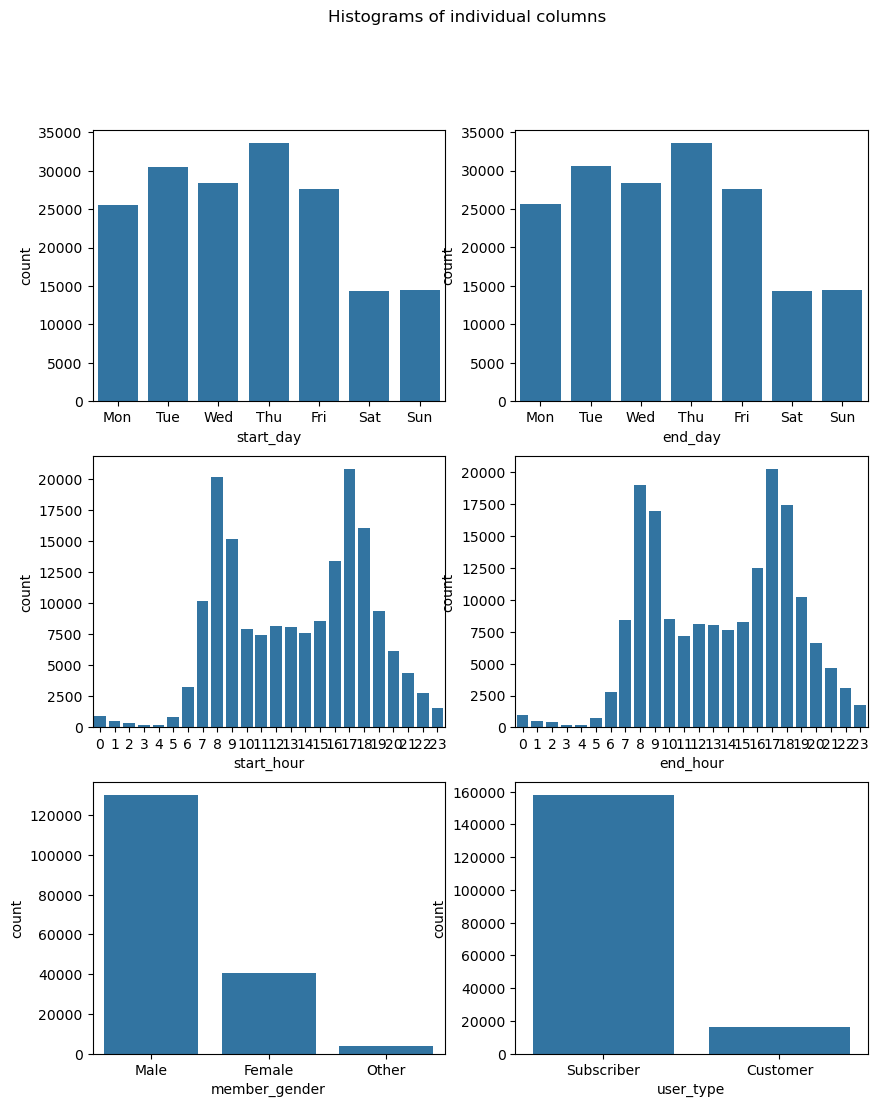

In [24]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, ncols = 2, figsize = [10,12])

default_color = sb.color_palette()[0]
sb.countplot(data = bike_share, x = 'start_day', color = default_color, ax = ax[0, 0])
sb.countplot(data = bike_share, x = 'end_day', color = default_color, ax = ax[0, 1])

sb.countplot(data = bike_share, x = 'start_hour', color = default_color, ax = ax[1, 0])
sb.countplot(data = bike_share, x = 'end_hour', color = default_color, ax = ax[1, 1])


sb.countplot(data = bike_share, x = 'member_gender', color = default_color, ax = ax[2, 0])
sb.countplot(data = bike_share, x = 'user_type', color = default_color, ax = ax[2, 1])

plt.suptitle("Histograms of individual columns")

plt.show()

On the first row, we have the distribution of the biking days. the left shows the distribution of the days the bikers choose to start and the right shows the end days. It is not surprising to see that the charts are identical. Of course they should be. The biggest outlier as we saw earlier spanned just one day. Mostly less than a 24 hour timeframe. It is therefore expected that the end days would strongly mirror the start days. That said, we can see that Thursday and tuesdays enjoy most bike patronage. Saturday and Sunday are the least with identical values

I also wonder why of the weekdays, monday is the day with least biking activity. Do they choose to go fancy or on cars on Mondays?

The second row shows the hour(time) distribution of start and end. Again, they are identical. We can see that there is less of biking activities at night 10pm till 5am. Fair. I assume people to be sleeping then. However, we see 2 peaks on the dataset. Looking at the time they occur, it is during the morning hours and evening hours. These are the times people go to work and close from work. My first instinct is to believe that those peaks are work related. the evening tapers slowly into the night. Afternoon periods are mostly flat and show similar trends.

On the last row, we see on the right, the distribution of male and female. We can see that the ration of male to female is 3:1. It shows that most men use the bikes than women. On the right of the same row, we see the subscriber plot. Well, the subscriber are the most by far. This tells me that the bike sharing program is quite a popular one in the region. 

Text(0.5, 1.0, 'Histogram of the bike share for all trip')

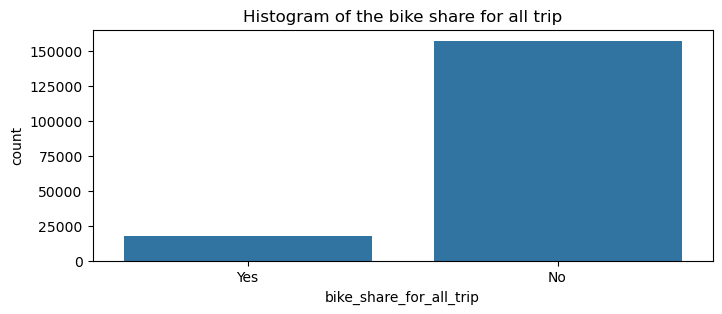

In [25]:
fig, ax = plt.subplots(nrows=1, figsize = [8,3])

default_color = sb.color_palette()[0]

sb.countplot(data = bike_share, x = 'bike_share_for_all_trip', color = default_color, ax = ax)
plt.title("Histogram of the bike share for all trip")
# ax[0].set_title("Bike share for all trip")
# sb.countplot(data = bike_share, x = 'start_station_id', color = default_color, ax = ax[1]);
# # ax[1].set_title("start station id");

Above, we see on the first graph, the bike share for all trip stats. If i understand the meaning of "bike share for all trips", It is clear that people do not go about their whole trip with bikes but maybe complete the trip or do some major travelling by other transport medium. 


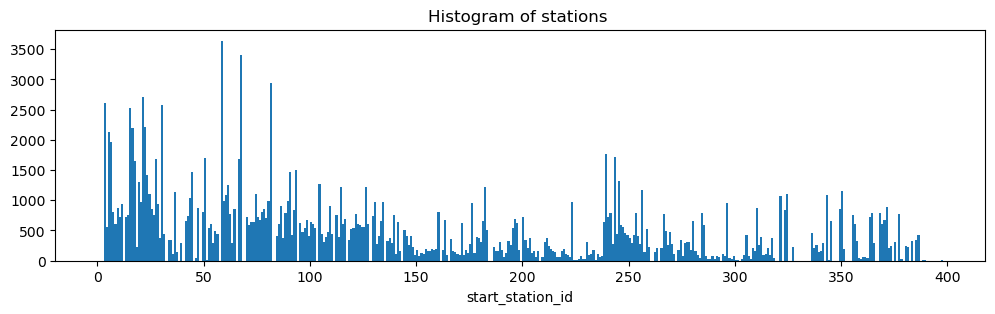

In [26]:
# plotting stations 
bins = np.arange(0, bike_share['start_station_id'].max()+binsize)
plt.figure(figsize=[12, 3])
plt.hist(data = bike_share, x = 'start_station_id', bins = bins)
plt.xlabel('start_station_id')
plt.title("Histogram of stations ")
plt.show()

The above shows the frequence or number of station usage. Obviously, some are more than others. I will not explore the station usage further

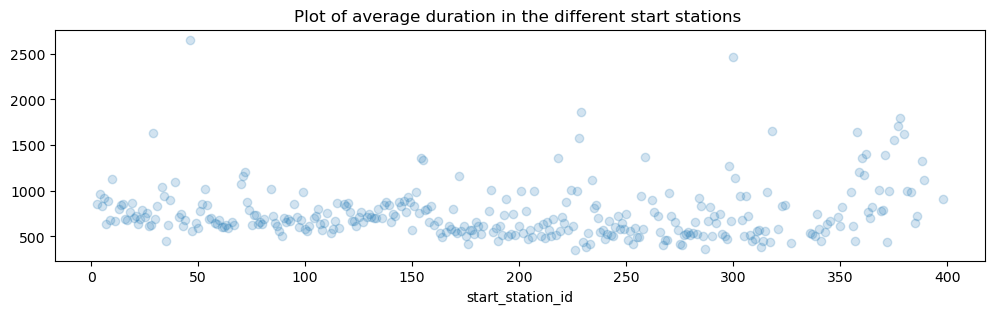

In [27]:
# plotting stations 

plt.figure(figsize=[12, 3])

plt.scatter(data = start_stations, x = 'start_station_id', y = 'avg_dur', alpha = 1/5)
plt.title("Plot of average duration in the different start stations ")
plt.xlabel('start_station_id')
plt.show()

Above, we note the distribution of the bike usage at the different start stations. We would get hold of the stations with most usage and show the histogram. For some reasond, stations with lower id tends to have more bike usage. Maybe they were the first stations and have much subscribers or they are more close together. 

Text(0.5, 0, 'station id')

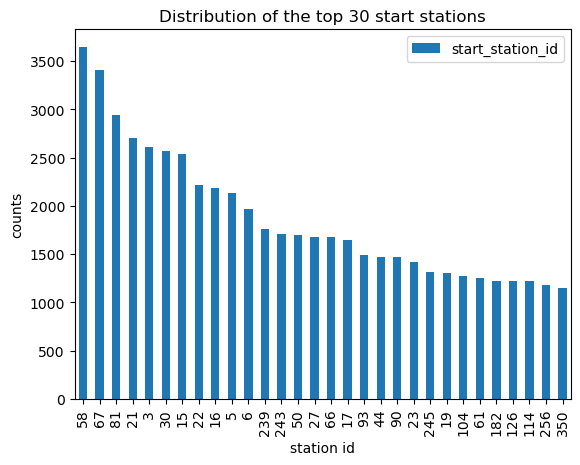

In [28]:
#plot histogram o fthe 30 start stations with most activity
bike_share.start_station_id.value_counts().reset_index().iloc[:30].plot(kind="bar", x="index")
plt.title("Distribution of the top 30 start stations");
plt.ylabel("counts");
plt.xlabel("station id")

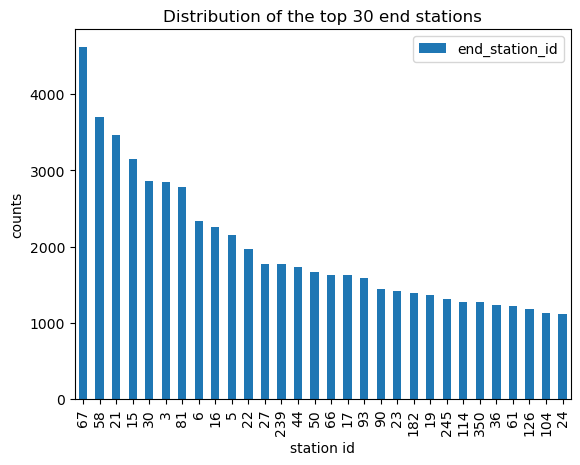

In [29]:
#plot histogram o fthe 30 end stations with most activity
bike_share.end_station_id.value_counts().reset_index().iloc[:30].plot(kind="bar", x="index")
plt.title("Distribution of the top 30 end stations");
plt.ylabel("counts");
plt.xlabel("station id");

What i can see from the above graph is that some stations enjoy high activities. Both plots have a large number of stations overlaps. I estimate that the full plot of all the stations will show striking similarities in their rentals or usage.

We wont be doing any GPS analysis to see why or the proximity of stations to themselves

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I consider the duration_sec as my variable of interest. I found out that on a log scale, the data tend to have the bell curve. Also there were some outliers which on close investigation were valid data. But i removed points far flung from the data.  Most people use the bike for smaller time duration. However, there were some notable usage that spanned long hours. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did a number of operation. I extracted the time of day and day of the week ftom the data. This is because the lumped datetime didnt give me much room for analysis and hid important data.  I also dropped the lat and long as i wont be using them for any spatial analysis. I converted the columns to appropriate data formats too. THere were not really any unusual distribution. year has quite some notable outliers though. I would say that the distributions of the stations were quite irregular. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To start off with, I want to look at the pairwise correlations present between features in the data.

In [30]:
numeric_vars = ['duration_sec', 'member_birth_year', 'start_hour']
categoric_vars = ['start_day', 'member_gender', 'bike_share_for_all_trip', "user_type"]#, 'start_station_id']

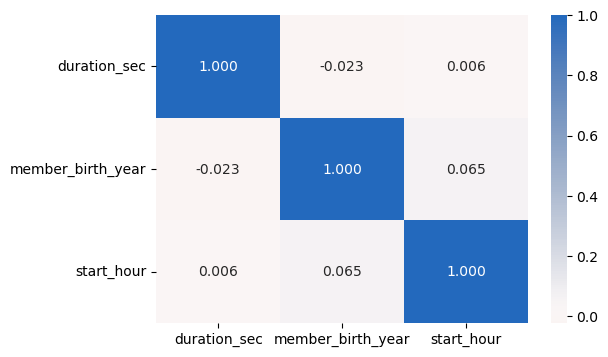

In [31]:
# correlation plot
plt.figure(figsize = [6, 4])
sb.heatmap(bike_share[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

dataset.shape= (174540, 17)
bike_share_samp.shape= (500, 17)


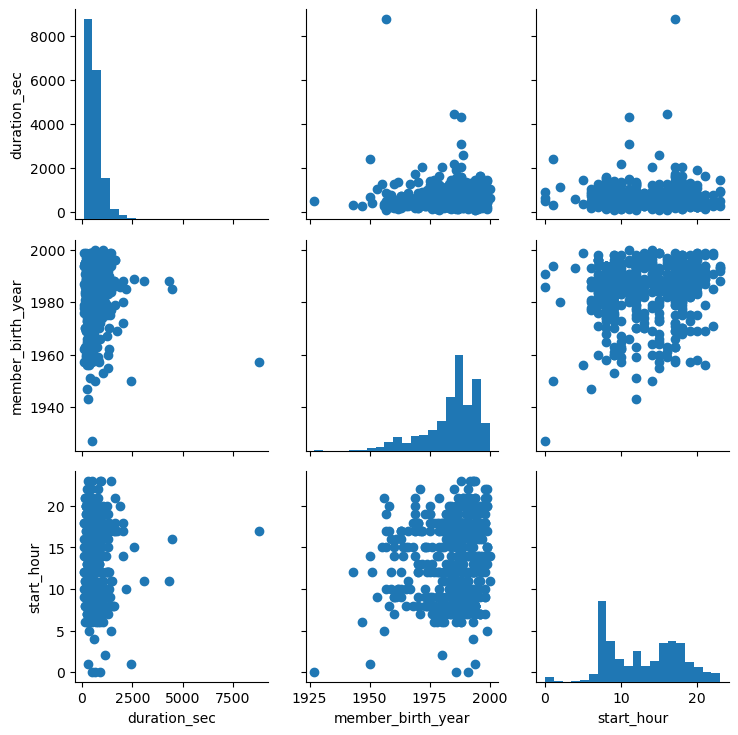

In [32]:
# plot matrix: sample 500 points so that plots are clearer and they render faster
print("dataset.shape=",bike_share.shape)
bike_share_samp = bike_share.sample(n=500, replace = False)
print("bike_share_samp.shape=",bike_share_samp.shape)

g = sb.PairGrid(data = bike_share_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Frankly speaking, the correlation between these columns are almost non existent. THere is a 6% correlation between the member member birth year and start hour. This is not enough to say much. but were i to say something based on that , i would say that there is a tendency for younger people to use the bike towards the evenings. more than the older people. 

in the same vein, there is a slight negative corelation between the duration sec and member birrth year. this says older people are slightly more akin to use the bike for longer hours. Could this be true? We would see later.

On the bigger scale, there is almost no correlation between the start hours and the duration. If i am to say though, i would argur that the night hours should have shorter duration and the day hours longer duration. I will explore this further as i progress.

Let's move on to looking at how 'duration_sec', 'member_birth_year', 'start_hour' correlate with the categorical variables.

<Figure size 1200x1200 with 0 Axes>

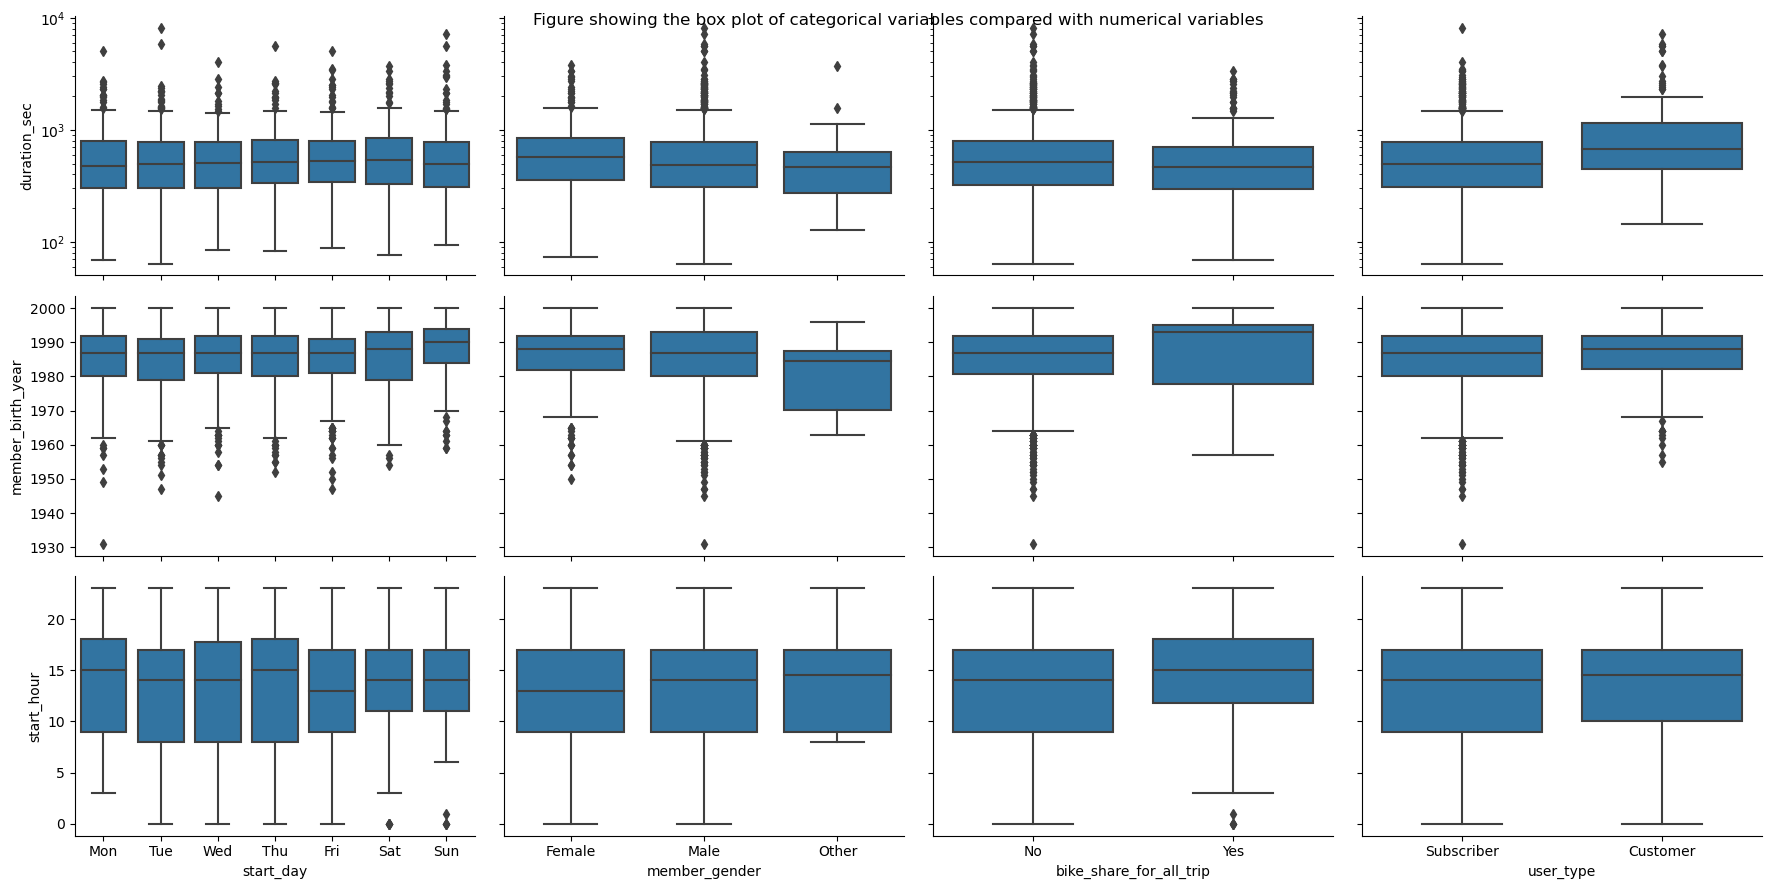

In [33]:
data_samp = bike_share.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    if y.name == "duration_sec":
        plt.yscale('log')

plt.figure(figsize = [12, 12]);
g = sb.PairGrid(data = data_samp, y_vars = ['duration_sec', 'member_birth_year', 'start_hour'], x_vars = categoric_vars,
                height = 3, aspect = 1.5);
g.map(boxgrid);
plt.suptitle("Figure showing the box plot of categorical variables compared with numerical variables")
plt.show();

One thing i can pick out from here is the customer has a higher mean duration_sec than the subscriber. This is somewhat interesting. 
    
On average, people who use te bike for all trips are younger, starts later and garners a lesser average duration than those who dont.

I should point out that since the data is sampled, the visualizations would be a bit different each time it is run. 
    
The plots for the start day does not convey much.

'start_day', 'member_gender', 'bike_share_for_all_trip', "user_type"
Finally, let's look at relationships between three categorical features.  

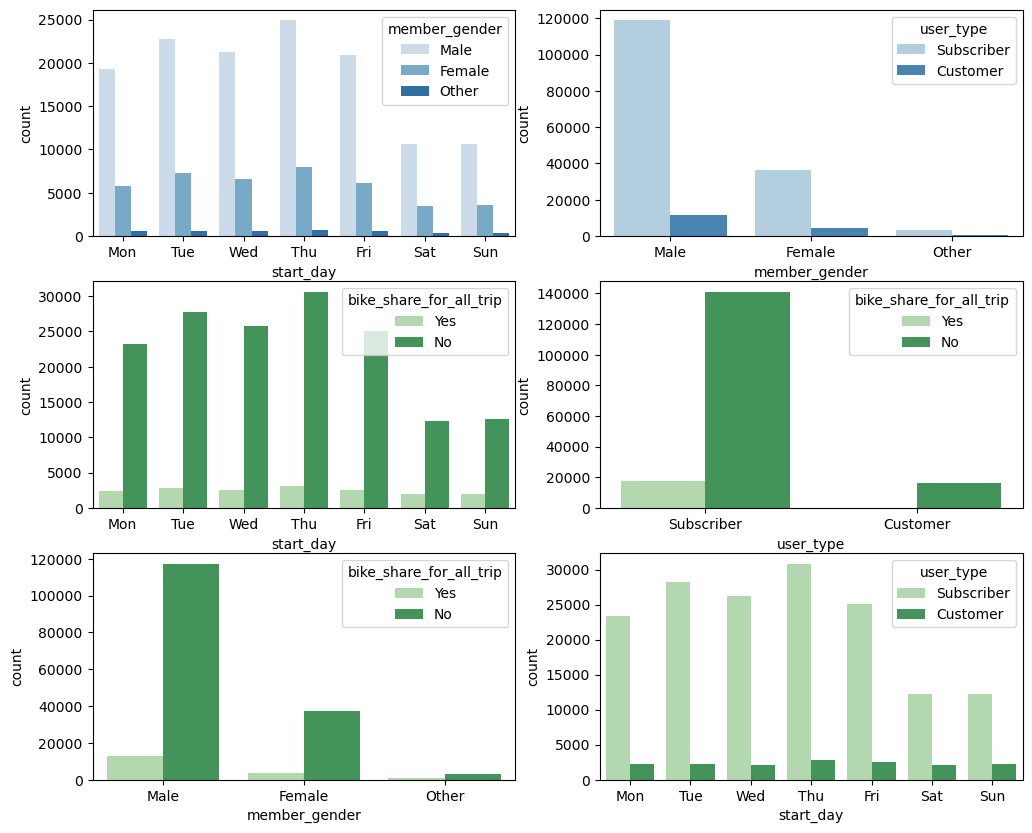

In [34]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 10])

# subplot 1: member_gender vs start_day
plt.subplot(3, 2, 1)
sb.countplot(data = bike_share, x = 'start_day', hue = 'member_gender', palette = 'Blues')

# subplot 2:  'member_gender' vs'user_type'
ax = plt.subplot(3, 2, 2)
sb.countplot(data = bike_share, x = 'member_gender', hue = 'user_type', palette = 'Blues')
# ax.legend(ncol = 2) 

# subplot 3: 'start_day' vs'bike_share_for_all_trip'
ax = plt.subplot(3, 2, 3)
sb.countplot(data = bike_share, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Greens')
# ax.legend(loc = 1, ncol = 2) 

# subplot 4: 'user_type' vs'bike_share_for_all_trip'
ax = plt.subplot(3, 2, 4)
sb.countplot(data = bike_share, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Greens')
# ax.legend(loc = 1, ncol = 2) 

# subplot 5: 'member_gender' vs'bike_share_for_all_trip'
ax = plt.subplot(3, 2, 5)
sb.countplot(data = bike_share, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')

# subplot 6: 'start_day' vs'user_type'
ax = plt.subplot(3, 2, 6)
sb.countplot(data = bike_share, x = 'start_day', hue = 'user_type', palette = 'Greens')

plt.show()

Once again, this confirms all analysis so far. Male are more than female, Thursday has most activity, sat and sun are identical. 

Intrestingly, we see that there are no customers with bike share for all trips. People who use the bike share for all trips are all subscribers. Lastly, the member gender has nothing to do with whether they use the bike share for all trip

Let's explore further

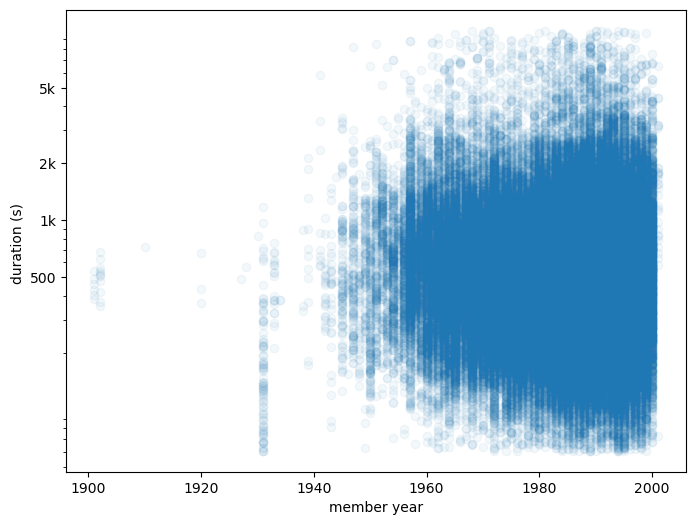

In [35]:
# scatter plot of duration vs. age, with log transform on duration axis
plt.figure(figsize = [8, 6])
plt.scatter(data = bike_share, x = 'member_birth_year', y = 'duration_sec', alpha = 1/20)
# plt.xlim([0, 3.5])
plt.xlabel('member year')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3], [500, '1k', '2k', '5k'])
plt.ylabel('duration (s) ')
plt.show()

Again, there are more younger people who use the bike sharing system. From here also, I can see that as the age increases, the duration tends to settle at around 500 - 1000. The mean durarion does not go down as i would expect. The variance is also low. There are also some visible clusters of ages at 1900 and 1930. So technically, older people do not bike for longer hours

To investigate further, I will do a scatter plot of the aggregated mean duration of the ages(year)

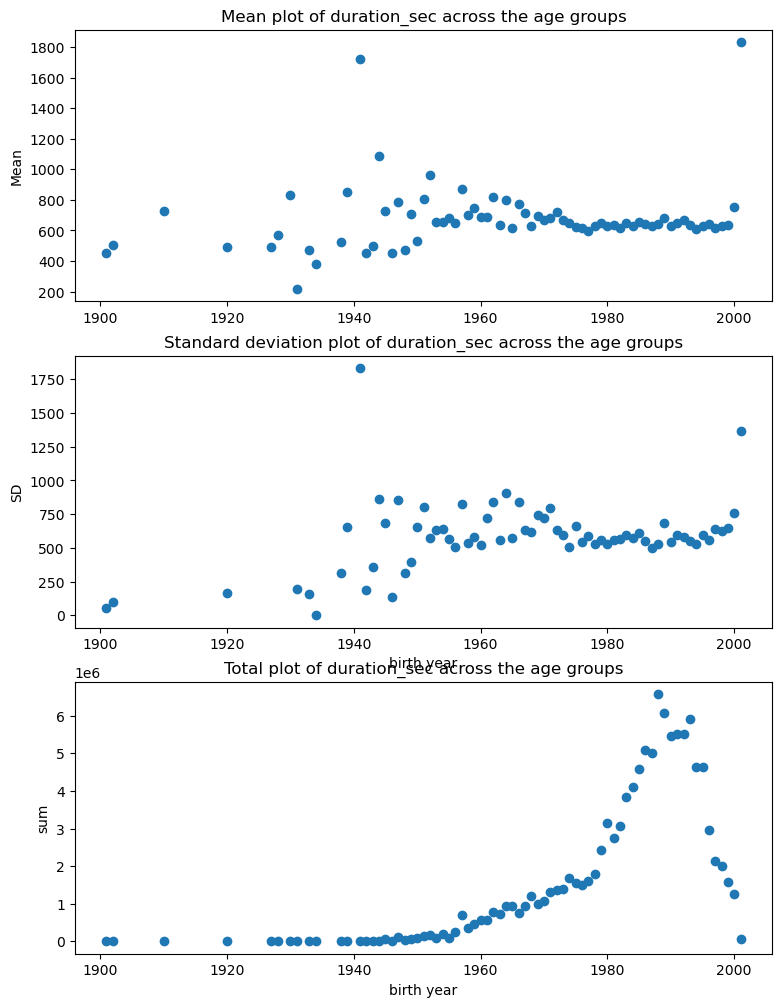

In [36]:
aggregated_year = bike_share.groupby("member_birth_year")["duration_sec"]
aggregated_year_mean = aggregated_year.mean().reset_index()
aggregated_year_var = aggregated_year.std().reset_index()
aggregated_year_sum = aggregated_year.sum().reset_index()
aggregated_year_count = aggregated_year.count().reset_index()

fig = plt.figure(figsize = [9, 12])
plt.subplot(3, 1, 1)
plt.title("Mean plot of duration_sec across the age groups")
plt.ylabel("Mean")
plt.scatter(data = aggregated_year_mean, x = 'member_birth_year', y = 'duration_sec', alpha = 1)

plt.subplot(3, 1, 2)
plt.title("Standard deviation plot of duration_sec across the age groups")
plt.ylabel("SD")
plt.xlabel("birth year")
plt.scatter(data = aggregated_year_var, x = 'member_birth_year', y = 'duration_sec', alpha = 1)

plt.subplot(3, 1, 3)
plt.title("Total plot of duration_sec across the age groups")
plt.ylabel("sum")
plt.xlabel("birth year")
plt.scatter(data = aggregated_year_sum, x = 'member_birth_year', y = 'duration_sec', alpha = 1)

# plt.scatter(data = aggregated_year_count, x = 'member_birth_year', y = 'duration_sec', alpha = 1)

THe plots above tells a lot. It comfirms our initial hypothesis that younger people use the bike sharing for longer duration. In the first figure, there is a point to the top right. This is a visible outlier representing the average duration of the most recent age group. It is OK to assume that they contribute a great deal to the large duration_sec. Moving towards the left, the mean seems to be stable then as the age increases further , there is a stutter of points (a divergence if you like). 

In the second fig, It is clear that the divergence of the duration increases with reducing age. The younger people tend to have typically very low and very high value. The high values, i would say contribute to the almost "outlier" in the linear scale of the duration_sec

Lastly, there is a strong correlation between the distribution (count) of the ages in the dataset and the sum of the duration_sec of the individual ages. The dominant age group is around 1990


**Going further, let us see how the duration vary with the start hour** Are some hours known for longer duration?

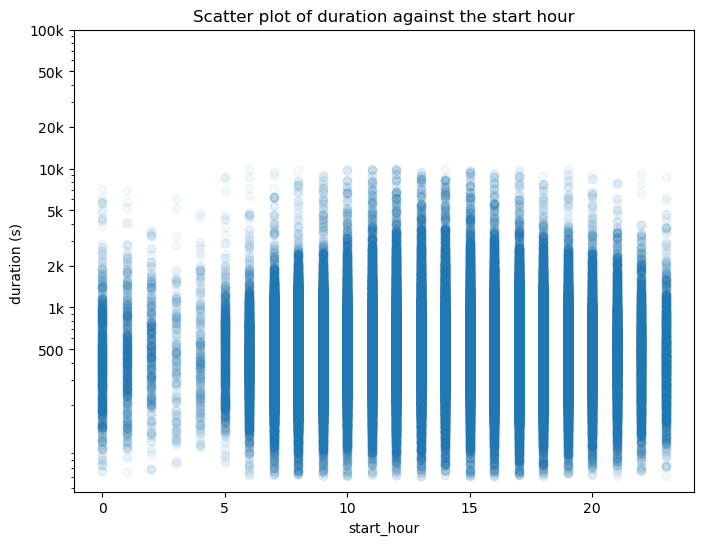

In [37]:
# scatter plot of duration vs. start_hour, with log transform on duration axis
plt.figure(figsize = [8, 6])
plt.scatter(data = bike_share, x = 'start_hour', y = 'duration_sec', alpha = 1/20)
plt.xlabel('start_hour')
plt.title("Scatter plot of duration against the start hour")
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 10e3, 20e3, 5e4, 10e4], [500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.ylabel('duration (s) ')
plt.show()

What we see in the above chart is that people tend to use bikes for longer duration when they start around 1pm and then the usage is least around 3am. Put differently day time users use the bikes for longer duration.

Can we make similar conclusion for the member birth year?

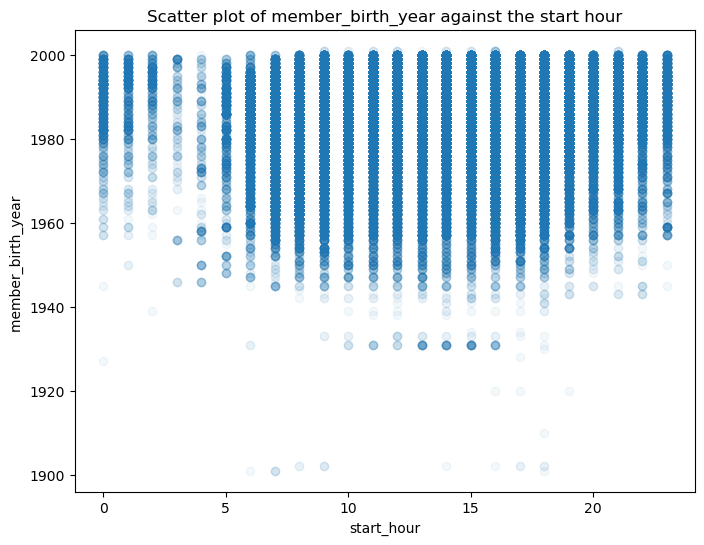

In [38]:
# scatter plot of member_birth_year vs. start hour, with log transform on duration axis
plt.figure(figsize = [8, 6])
plt.scatter(data = bike_share, x = 'start_hour', y = 'member_birth_year', alpha = 1/20)
plt.title("Scatter plot of member_birth_year against the start hour")
plt.xlabel('start_hour')
plt.ylabel('member_birth_year ')
plt.show()

we see older folks starting out more when there is daylight. 7am - 7pm mostly. In the early hours of the day, younger folks are most likely to use the bikes

Now, let's take a second look at the duration_sec and start_hour, and member birth_year distributions on the three categorical variables: 'start_day', 'member_gender', 'bike_share_for_all_trip', "user_type". Befort that we can define a function that will help us withthe log transforms

In [39]:
# compute the logarithm of duration to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

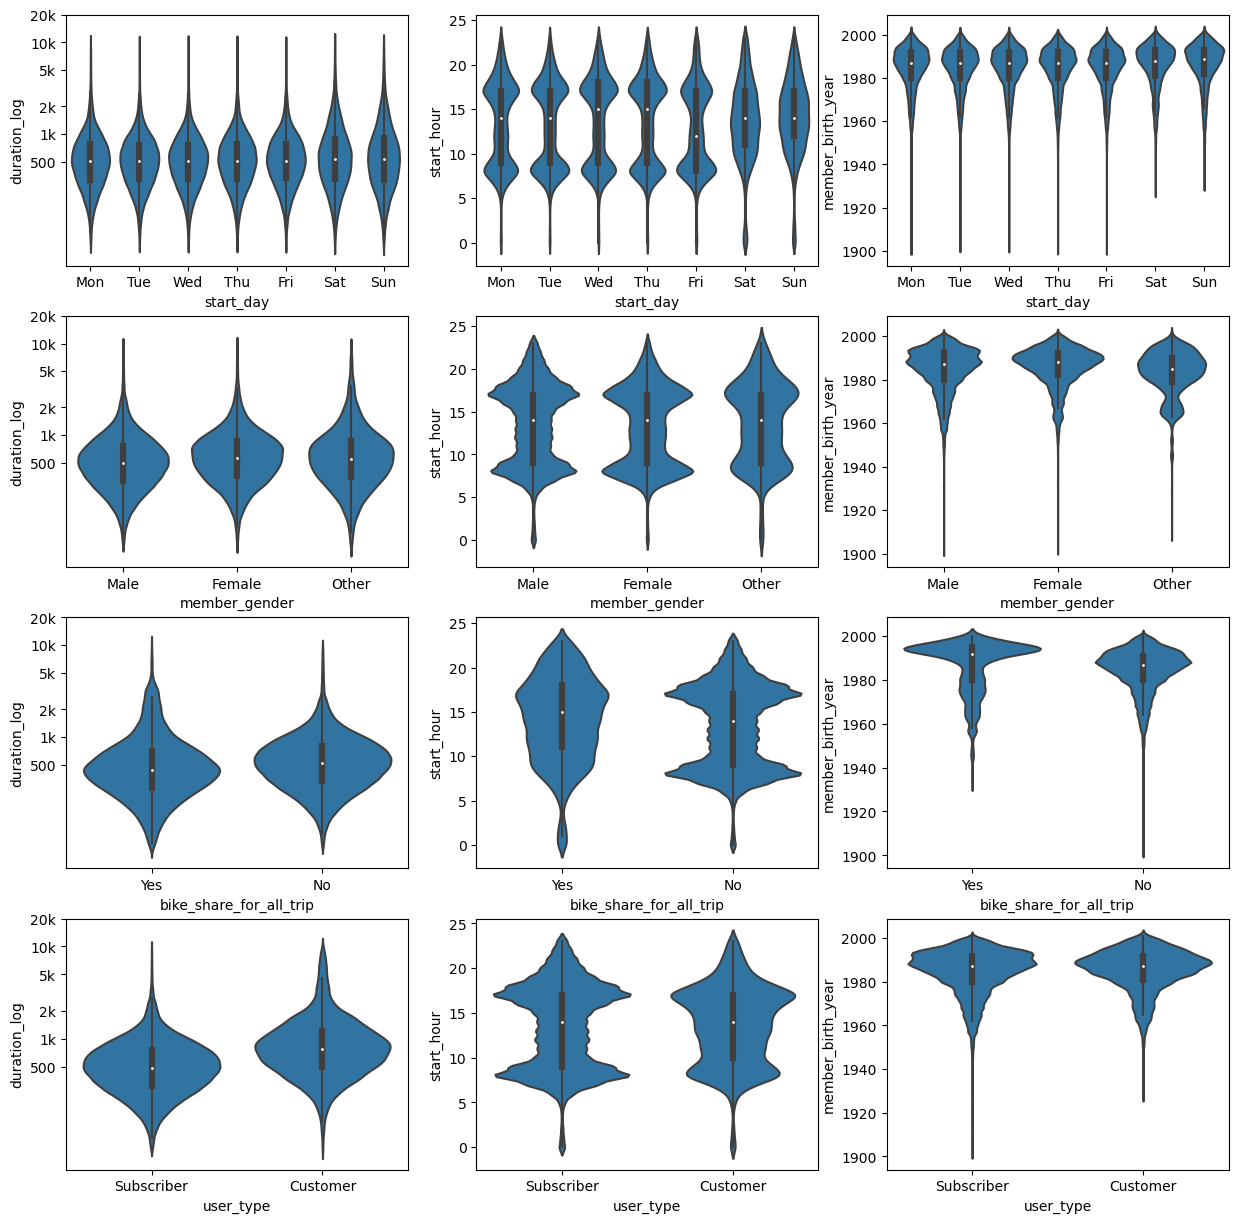

In [40]:
# plot the categorical variables against duration_sec and start_hour and member_birth_year again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 3, nrows = 4 , figsize = [15,15])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = bike_share, x = var, y = 'duration_log', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
#     ax[i,0].set_yscale('log')
    
    
    sb.violinplot(data = bike_share, x = var, y = 'start_hour', ax = ax[i,1],
               color = default_color)

    sb.violinplot(data = bike_share, x = var, y = 'member_birth_year', ax = ax[i,2],
               color = default_color)

plt.show()

At this point, I would want to point out a few things: Most of the observations are marginally observable though.

When i consider the box plot and the violin plot, it seems as though that women ride for a longer time more than men averagely. In the violin plot of member gender against duration_sec, I see that the violin plot for female tends to be somewhat elevated.  More men use the shorter duration.

This plot furthermore tells me something. On the plot of start hour against start day, we see saturday and sunday having a somewhat different curve than others. This tells me that unlike the weekdays where people use the bike sharing during the morning and after work on evenings, on wekends, they use the sharing system montly in the afternoons. I.e 10am to 5pm mostly. On this I can agree with the plot.

While not clearly visible, the first plot shows that sat and sun have tendencies to have points in the outlier region or use bikes longer. The violin tapers more to the top. 

In the bike share for all trip against age, I can tell that people who use the bike share for all trip are generally more younger than those who dont. 

In the bike share for all trip against the start hour, people who do not use the bike share for all trips have the tendencies to fall into 2 usage time frames. The morning and evenings. However those who do are mostly active in the evenings. THus we can say that subscribers are mostly active in the evenings


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Averagely, the customer tends to have more duration and people tends to use the bikes for longer duration when they start around 1pm. I can also say that as surprising as it seems, older people didnt have very low duration but averaged to about > 500. I have also observed that, overlooking outliers, people who use bikes on saturdays and sundays tend to have marginally longer duration. Also peoplle eho use the bike in the afternoon tend to have longer duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Indeed. I can say that the weekends receive more activity during the day.  I can also tell that people who use the bike share for all trip are generally more younger than those who dont. other observations in the dat have been communicated earlier. People who use the bukeshare for all trips are mostly subscribers and they are mostly active in the evenings.


## Multivariate Exploration


In [41]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    is_year = kwargs.pop('is_year')
    is_duration = kwargs.pop('is_duration')
    if is_year:
        bins_x = np.arange(1970, 2002+2, 2)
    else:
        bins_x = np.arange(0, 24)
    if is_duration:
        bins_y = np.arange(1.5, 3.7+0.2, 0.2)
        plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 10e3])), [500, '1k', '2k', '5k', "10k"])
        plt.hist2d(x, np.log10(y), bins = [bins_x, bins_y], cmap = palette, cmin = 5)
    else:
        bins_y = np.arange(1970, 2002+2, 2)
        plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 5)
        
    


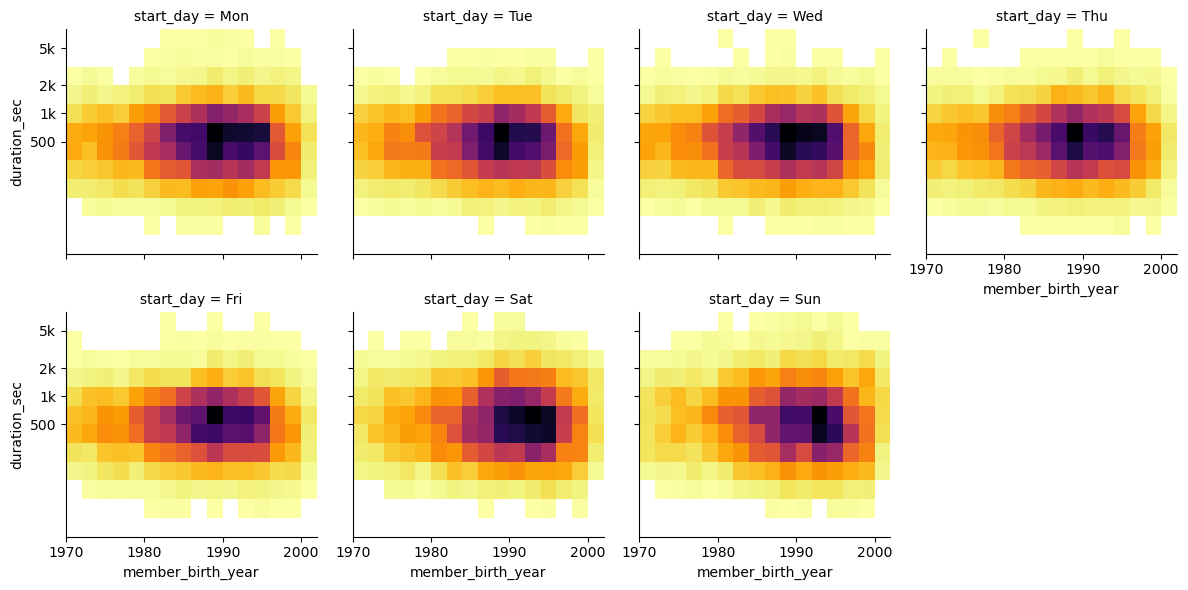

In [42]:
# create faceted heat maps on levels of the day variable
g = sb.FacetGrid(data = bike_share, col = 'start_day', col_wrap = 4, height = 3  )
g.map(hist2dgrid, 'member_birth_year', 'duration_sec',  color = 'inferno_r', is_year=True, is_duration=True)
g.set_xlabels('member_birth_year')
g.set_ylabels('duration_sec')
# plt.figure(figsize = [9, 12])
# plt.suptitle("Heat maps of duration across start day and member birth year(age)")
plt.show()

From the above, I can say that the day has little to do with how likely people are going to use the bikes for longer duration. The above only thells us that younger people are more active on the system and again this is true as we saw on the histogram and scatterplot of age(year) vs sum of duration.This is in agreement with the violin plot of the last section. 

Next, lets see how the duration is affected by start hour, taking member gender into consideration.

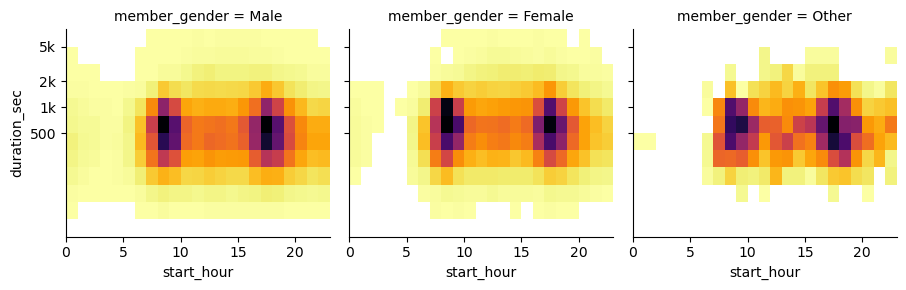

In [43]:
# create faceted heat maps on member gender variable
g = sb.FacetGrid(data = bike_share, col = 'member_gender', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'start_hour', 'duration_sec',  color = 'inferno_r', is_year = False,   is_duration=True)
g.set_xlabels('start_hour')
g.set_ylabels('duration_sec')

plt.show()

Once more, male and female show similar characteristics across the span of day hours. The empty spaces on the female map on the left tells us though that females are less likely to use the bike at night - fair.

Next, we investigate how the start day, start hour and duration all tie up together

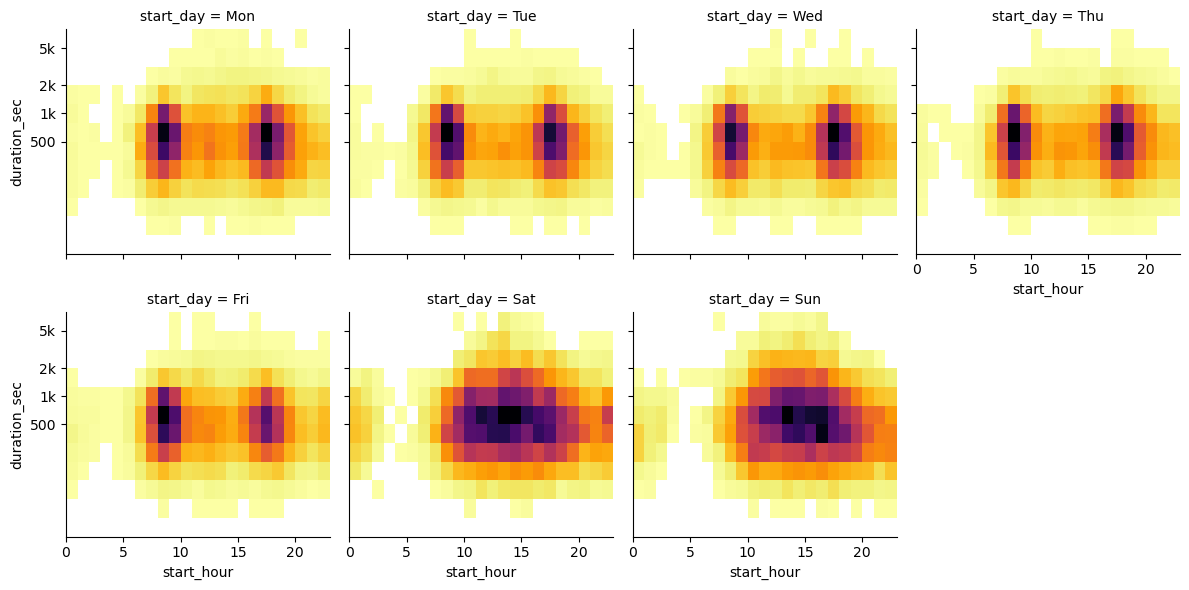

In [44]:
# create faceted heat maps on levels of the day variable
g = sb.FacetGrid(data = bike_share, col = 'start_day', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'start_hour', 'duration_sec',  color = 'inferno_r', is_year = False,  is_duration=True)
g.set_xlabels('start_hour')
g.set_ylabels('duration_sec')

plt.show()

Saturdays and sundays as pointed earlier, show signs of activities during the daytime mostly having the darkest areas at the centre. Aslo the dark squares on Sat. and Sun. extend to the top more in comparison with the others. This lets us know of the higher duration of bikers during the weekend.

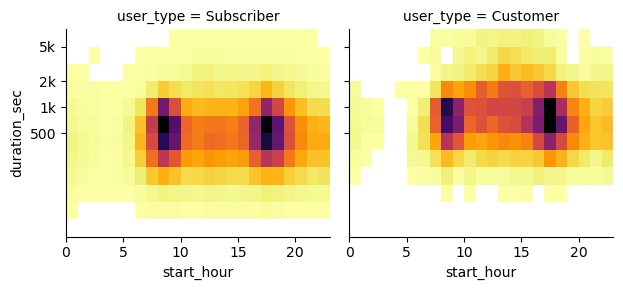

In [45]:
# create faceted heat maps on levels of the day variable
g = sb.FacetGrid(data = bike_share, col = 'user_type', col_wrap = 4, height = 3 )
g.map(hist2dgrid, 'start_hour', 'duration_sec',  color = 'inferno_r', is_year = False,  is_duration=True)
g.set_xlabels('start_hour')
g.set_ylabels('duration_sec')

plt.show()

The customer is more active during the day and contributes more to the increased duration

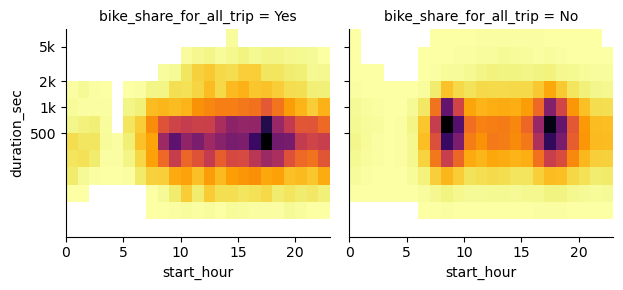

In [46]:
# create faceted heat maps on levels of the bike_share_for_all_trip variable
g = sb.FacetGrid(data = bike_share, col = 'bike_share_for_all_trip', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'start_hour', 'duration_sec',  color = 'inferno_r', is_year = False, is_duration=True)
g.set_xlabels('start_hour')
g.set_ylabels('duration_sec')

plt.show()

Users who use the bike share for all trips prefers to start during the hours of daylight and could contribute more to the outliers - marginally though!

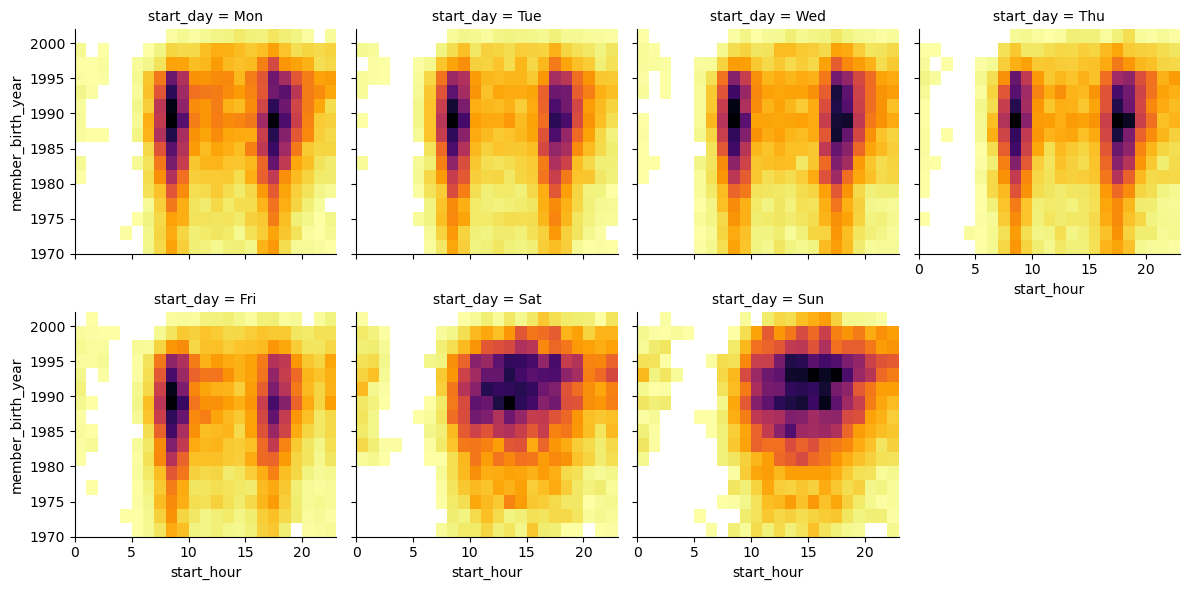

In [47]:
# create faceted heat maps on levels of the start_day variable
g = sb.FacetGrid(data = bike_share, col = 'start_day', col_wrap = 4, height = 3   )
g.map(hist2dgrid, 'start_hour', 'member_birth_year',  color = 'inferno_r', is_year = False, is_duration=False)
g.set_xlabels('start_hour')
g.set_ylabels('member_birth_year')

plt.show()

There is no direct corelation between member birth year and start hour across the various days

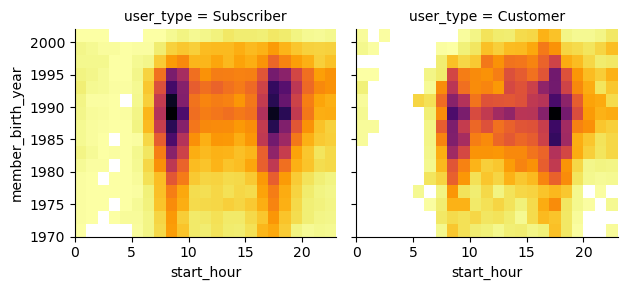

In [48]:
# create faceted heat maps on levels of the user_type variable
g = sb.FacetGrid(data = bike_share, col = 'user_type', col_wrap = 4, height = 3   )
g.map(hist2dgrid, 'start_hour', 'member_birth_year',  color = 'inferno_r', is_year = False, is_duration=False)
g.set_xlabels('start_hour')
g.set_ylabels('member_birth_year')

plt.show()

Users who are customers prefers to start during the hours of daylight and could contribute more to the outliers - marginally though!

#### In the following figures, we would use a point plot to analyse and visualize the variables relationships

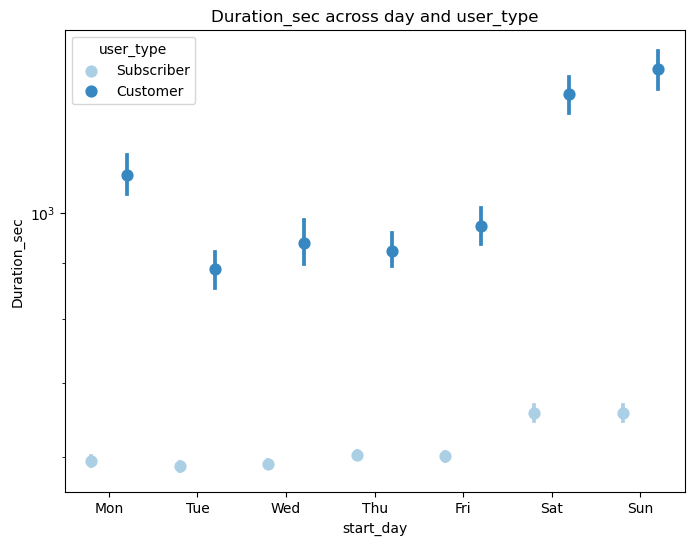

In [49]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration_sec across day and user_type')
plt.ylabel('Duration_sec')
plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

THe pointplot wastes no time in showing us that indeed, customers contribute significantly to the outliers. THis is very obvious. The heat maps have failed to show this because of the relatively small numbers of outliers. The point plot, shows us this clearly! The figure above also tells us that the weekends have higher duration than the weekdays.

Also, the customers have a high variance in their usage.

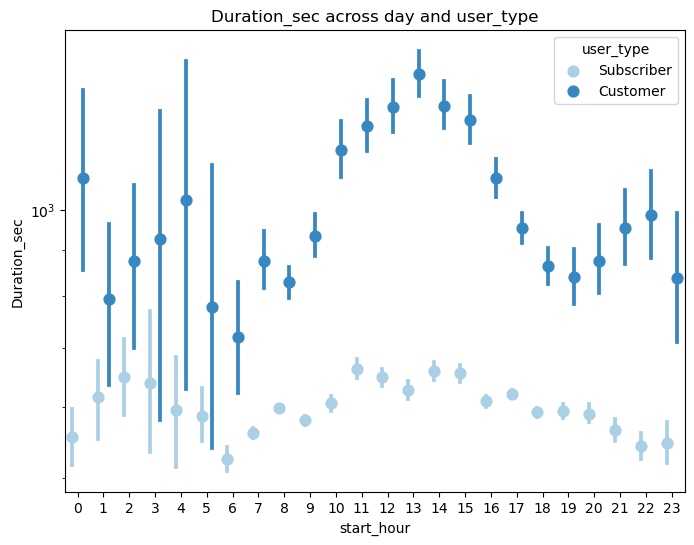

In [50]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share, x = 'start_hour', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration_sec across day and user_type')
plt.ylabel('Duration_sec')
plt.yscale('log')
ax.set_yticklabels([],minor = True)
plt.show();

Same conclusion with the previous graph

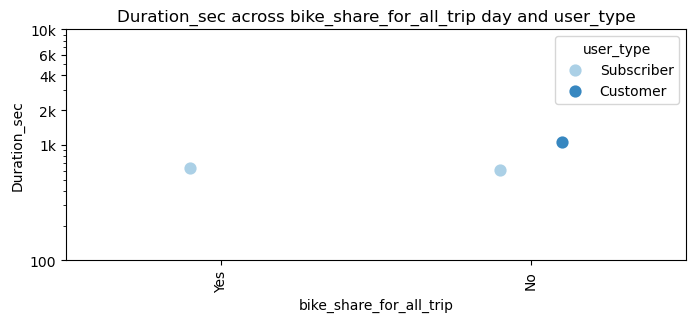

In [51]:
fig = plt.figure(figsize = [8,3])
ax = sb.pointplot(data = bike_share, x = 'bike_share_for_all_trip', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.2)
plt.title('Duration_sec across bike_share_for_all_trip day and user_type')
plt.ylabel('Duration_sec')
plt.yscale('log')
plt.xticks(rotation=90)
plt.yticks([100, 1000, 2e3, 4e3, 6e3, 1e4], ["100","1k", '2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
# ax.legend(loc = 1, ncol = 2)
plt.show();

Again, there are no customers with bike share for all trips. People who use the bike share for all trips are all subscribers. Furthermore, customers have longer duration on the average. 

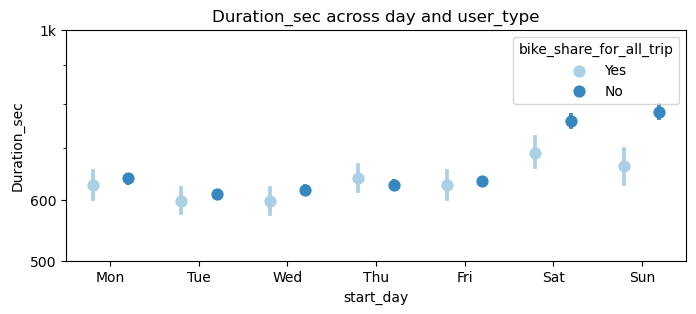

In [52]:
fig = plt.figure(figsize = [8,3])
ax = sb.pointplot(data = bike_share, x = 'start_day', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration_sec across day and user_type')
plt.ylabel('Duration_sec')
plt.yscale('log')
plt.yticks([500, 600, 1e3], [ "500", "600", '1k'])
ax.set_yticklabels([],minor = True)
plt.show();

Especially during the weekend, those who do not use the bike share for all trips tend to use it for longer time. The figure above somewhat shows that there is a gradual increase in the duration_sec as you move towards the weekend.

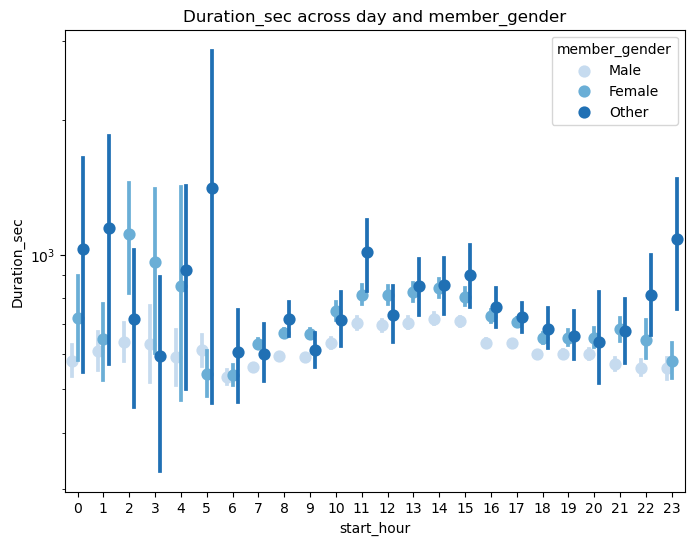

In [53]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share, x = 'start_hour', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration_sec across day and member_gender')
plt.ylabel('Duration_sec')
plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

The difference is marginaly noticeable but the plot shows that female use the bikes for longer duration than men. Originally we saw that more people used the bikes in the day and normally this will result in a good percentage of people who use the bike more to be during the day. However the above plot tells us that while the previous is true, a good percentage of people who bike in the early hours have got long duration also.

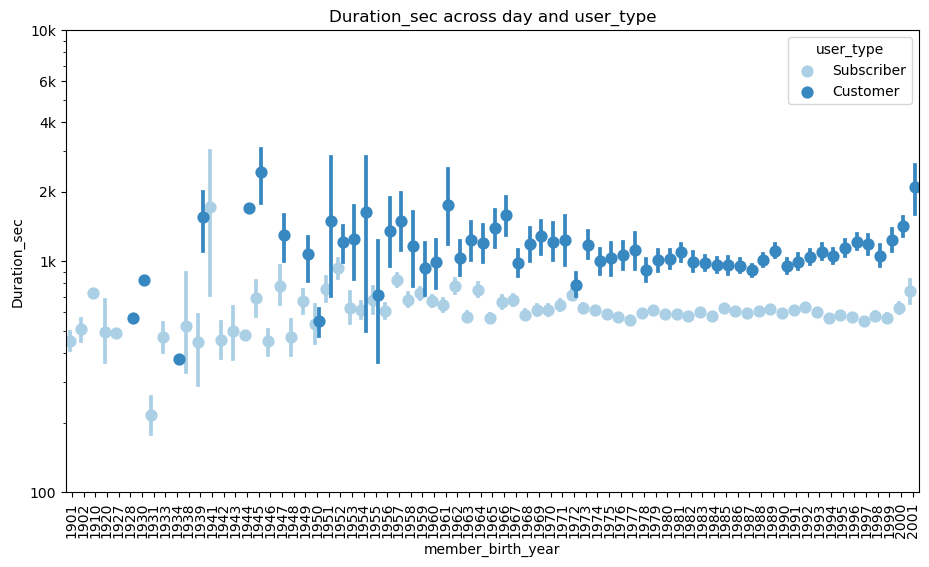

In [54]:
fig = plt.figure(figsize = [11,6])
ax = sb.pointplot(data = bike_share, x = 'member_birth_year', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration_sec across day and user_type')
plt.ylabel('Duration_sec')
plt.yscale('log')
plt.xticks(rotation=90)
plt.yticks([100, 1000, 2e3, 4e3, 6e3, 1e4], ["100","1k", '2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

There arent much older customers. Perhaps that explains why younger people contribute more to the outliers. Since we have already established that customers are majirly responsible for the increased duration in the dataset

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part, most of my observations from the bivariate explorations were confirmed. First i saw that the customers are chiefly responsible for most of the high duration in the dataset. I saw that the females wwould rather choose tto bike during the day. We also saw that saturdays and sundays were more likely to have long duration_sec than any other days. Customers and those who use the bike share for all trips utilize fully the daytime hours.

### Were there any interesting or surprising interactions between features?

> It was interesting to see that on the average, female averaged more duration_hours than the male. Also, on all plots, i observed that the customers or as a matter of fact any variable contributing mote to the increased duration_sec had more variance than those contributing less. A single variable therefore may not be enough to predict how long the bikes will be used.

## Conclusions
> In this project, I have been able to see how various variables/columns of the ford bike data affect how long they may be using the bikes. In a nutshell, I have found that the following factors especially when they are strenghtened by each other affect how long the bikers will use the bike for. They include:
 1. afternoon - during the day bike share are more akin to be used for long hours 
 2. weekends - bike share on weekends has the most of outlier per day (duration) than any other days
 3. female - female on the average bike for longer hours than male
 4. age - aside being more in the dataset, they also have highest variance in usage
 5. customer - they are perhaps the biggest influencer of how long the bike share spans. They use the bikes longer and they do not use the bikeshare for all trips
 
 To arrive at the above conclusions however, I have cleaned the data, derived the days and hour from the datetime, changed some columns data types and dropped the gps columns. I then proceeded to perform monovariare exploration, then bivariate and lastly multivatiate.